## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 17s 338us/step - loss: 1.9173 - acc: 0.3078 - val_loss: 1.7343 - val_acc: 0.3807
Epoch 2/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.7055 - acc: 0.3883 - val_loss: 1.6567 - val_acc: 0.4099
Epoch 3/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.6190 - acc: 0.4207 - val_loss: 1.6061 - val_acc: 0.4246
Epoch 4/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.5693 - acc: 0.4380 - val_loss: 1.5332 - val_acc: 0.4511
Epoch 5/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.5083 - acc: 0.4634 - val_loss: 1.5852 - val_acc: 0.4296
Epoch 6/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.4798 - acc: 0.4713 - val_loss: 1.4713 - val_acc: 0.4761
Epoch 7/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.4380 - acc: 0.4856 - val_loss: 

50000/50000 [==============================] - 8s 165us/step - loss: 0.5369 - acc: 0.8087 - val_loss: 1.9946 - val_acc: 0.5096
Epoch 60/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.5277 - acc: 0.8124 - val_loss: 2.0221 - val_acc: 0.5163
Epoch 61/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.5130 - acc: 0.8168 - val_loss: 2.1301 - val_acc: 0.5046
Epoch 62/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.5119 - acc: 0.8178 - val_loss: 2.1086 - val_acc: 0.5080
Epoch 63/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.4968 - acc: 0.8226 - val_loss: 2.1139 - val_acc: 0.5139
Epoch 64/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.4764 - acc: 0.8320 - val_loss: 2.1007 - val_acc: 0.5205
Epoch 65/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.4816 - acc: 0.8295 - val_loss: 2.2337 - val_acc: 0.5026
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 8s 157us/step - loss: 0.2699 - acc: 0.9041 - val_loss: 3.4136 - val_acc: 0.4875
Epoch 118/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.2851 - acc: 0.8989 - val_loss: 3.4540 - val_acc: 0.4984
Epoch 119/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.2342 - acc: 0.9150 - val_loss: 3.3988 - val_acc: 0.5000
Epoch 120/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.2481 - acc: 0.9115 - val_loss: 3.4385 - val_acc: 0.4971
Epoch 121/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.2434 - acc: 0.9111 - val_loss: 3.4510 - val_acc: 0.5018
Epoch 122/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.2324 - acc: 0.9164 - val_loss: 3.4419 - val_acc: 0.5027
Epoch 123/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.2299 - acc: 0.9186 - val_loss: 3.4716 - val_acc: 0.5037
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 8s 162us/step - loss: 0.2243 - acc: 0.9237 - val_loss: 4.2739 - val_acc: 0.4862
Epoch 176/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.1693 - acc: 0.9400 - val_loss: 4.1892 - val_acc: 0.4989
Epoch 177/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.1521 - acc: 0.9459 - val_loss: 4.1025 - val_acc: 0.5065
Epoch 178/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.1245 - acc: 0.9561 - val_loss: 4.2891 - val_acc: 0.4954
Epoch 179/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.1582 - acc: 0.9445 - val_loss: 4.2180 - val_acc: 0.5023
Epoch 180/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.1489 - acc: 0.9467 - val_loss: 4.2297 - val_acc: 0.4984
Epoch 181/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1522 - acc: 0.9467 - val_loss: 4.2330 - val_acc: 0.4940
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 8s 151us/step - loss: 0.1758 - acc: 0.9421 - val_loss: 4.5140 - val_acc: 0.4989
Epoch 234/500
50000/50000 [==============================] - 8s 150us/step - loss: 0.1074 - acc: 0.9632 - val_loss: 4.6228 - val_acc: 0.4976
Epoch 235/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.0817 - acc: 0.9722 - val_loss: 4.5452 - val_acc: 0.4990
Epoch 236/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0675 - acc: 0.9770 - val_loss: 4.6138 - val_acc: 0.5041
Epoch 237/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0868 - acc: 0.9706 - val_loss: 4.7303 - val_acc: 0.4924
Epoch 238/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.2649 - acc: 0.9164 - val_loss: 4.6284 - val_acc: 0.4905
Epoch 239/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1918 - acc: 0.9363 - val_loss: 4.6418 - val_acc: 0.4947
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 8s 151us/step - loss: 0.0626 - acc: 0.9784 - val_loss: 4.7748 - val_acc: 0.4978
Epoch 292/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.0630 - acc: 0.9784 - val_loss: 4.8749 - val_acc: 0.4988
Epoch 293/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1394 - acc: 0.9542 - val_loss: 5.1640 - val_acc: 0.4697
Epoch 294/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.2371 - acc: 0.9279 - val_loss: 4.7379 - val_acc: 0.4994
Epoch 295/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1139 - acc: 0.9623 - val_loss: 4.8397 - val_acc: 0.4953
Epoch 296/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.0408 - acc: 0.9867 - val_loss: 4.7714 - val_acc: 0.4988
Epoch 297/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0331 - acc: 0.9893 - val_loss: 4.8248 - val_acc: 0.4995
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 8s 157us/step - loss: 0.2724 - acc: 0.9234 - val_loss: 5.0230 - val_acc: 0.4762
Epoch 350/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.2283 - acc: 0.9329 - val_loss: 4.8326 - val_acc: 0.4994
Epoch 351/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.0763 - acc: 0.9751 - val_loss: 4.9114 - val_acc: 0.4992
Epoch 352/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.0381 - acc: 0.9875 - val_loss: 4.8728 - val_acc: 0.5006
Epoch 353/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.0177 - acc: 0.9953 - val_loss: 4.9321 - val_acc: 0.5005
Epoch 354/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.0099 - acc: 0.9980 - val_loss: 4.9660 - val_acc: 0.5040
Epoch 355/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.0085 - acc: 0.9987 - val_loss: 4.9853 - val_acc: 0.5051
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 8s 151us/step - loss: 0.0307 - acc: 0.9905 - val_loss: 4.9580 - val_acc: 0.4979
Epoch 408/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0448 - acc: 0.9849 - val_loss: 4.9845 - val_acc: 0.5024
Epoch 409/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1189 - acc: 0.9618 - val_loss: 5.0490 - val_acc: 0.4966
Epoch 410/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.1060 - acc: 0.9647 - val_loss: 5.1793 - val_acc: 0.4832
Epoch 411/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.1037 - acc: 0.9662 - val_loss: 5.0590 - val_acc: 0.4955
Epoch 412/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.0678 - acc: 0.9770 - val_loss: 5.0951 - val_acc: 0.4960
Epoch 413/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.0551 - acc: 0.9816 - val_loss: 5.0546 - val_acc: 0.4967
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 8s 165us/step - loss: 0.0031 - acc: 0.9996 - val_loss: 5.1848 - val_acc: 0.5047
Epoch 466/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.1970 - acc: 0.9571 - val_loss: 5.4114 - val_acc: 0.4687
Epoch 467/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.5428 - acc: 0.8709 - val_loss: 4.7672 - val_acc: 0.4908
Epoch 468/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0814 - acc: 0.9733 - val_loss: 4.9149 - val_acc: 0.5030
Epoch 469/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0269 - acc: 0.9924 - val_loss: 4.9148 - val_acc: 0.5017
Epoch 470/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.0092 - acc: 0.9985 - val_loss: 4.9660 - val_acc: 0.5019
Epoch 471/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.0067 - acc: 0.9991 - val_loss: 4.9794 - val_acc: 0.5050
Epoch 472/500
50000/50000 

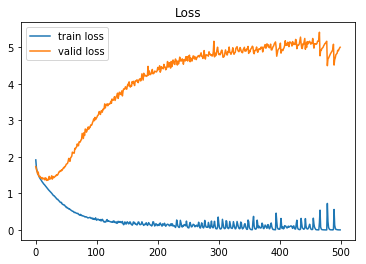

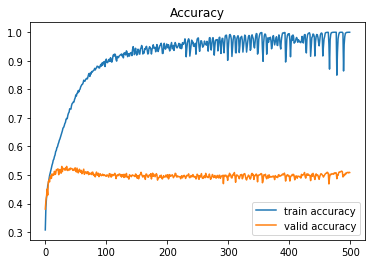

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## SGD

In [9]:
model2 = build_mlp()
optimizer2 = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer2)

In [10]:
model2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 14s 287us/step - loss: 1.8785 - acc: 0.3295 - val_loss: 1.6928 - val_acc: 0.4082
Epoch 2/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.6519 - acc: 0.4149 - val_loss: 1.6320 - val_acc: 0.4205
Epoch 3/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.5614 - acc: 0.4462 - val_loss: 1.5510 - val_acc: 0.4487
Epoch 4/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.4934 - acc: 0.4704 - val_loss: 1.5744 - val_acc: 0.4373
Epoch 5/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.4474 - acc: 0.4878 - val_loss: 1.4906 - val_acc: 0.4641
Epoch 6/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.3989 - acc: 0.5066 - val_loss: 1.4734 - val_acc: 0.4756
Epoch 7/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.3662 - acc: 0.5165 - val_loss: 1

50000/50000 [==============================] - 6s 126us/step - loss: 0.3056 - acc: 0.8933 - val_loss: 2.4992 - val_acc: 0.5125
Epoch 60/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.2917 - acc: 0.8989 - val_loss: 2.3164 - val_acc: 0.5190
Epoch 61/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.2741 - acc: 0.9043 - val_loss: 2.4695 - val_acc: 0.5222
Epoch 62/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2680 - acc: 0.9062 - val_loss: 2.3536 - val_acc: 0.5294
Epoch 63/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.2691 - acc: 0.9060 - val_loss: 2.4517 - val_acc: 0.5110
Epoch 64/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.2657 - acc: 0.9068 - val_loss: 2.4510 - val_acc: 0.5146
Epoch 65/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.2337 - acc: 0.9180 - val_loss: 2.7186 - val_acc: 0.4887
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 114us/step - loss: 0.0855 - acc: 0.9699 - val_loss: 3.5612 - val_acc: 0.5338
Epoch 118/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.0791 - acc: 0.9722 - val_loss: 3.6080 - val_acc: 0.5263: 1s - loss
Epoch 119/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0934 - acc: 0.9667 - val_loss: 3.8738 - val_acc: 0.5143
Epoch 120/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.1096 - acc: 0.9616 - val_loss: 3.5512 - val_acc: 0.5282
Epoch 121/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0833 - acc: 0.9714 - val_loss: 3.6527 - val_acc: 0.5290
Epoch 122/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0787 - acc: 0.9720 - val_loss: 3.6551 - val_acc: 0.5307
Epoch 123/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0690 - acc: 0.9754 - val_loss: 3.7183 - val_acc: 0.5255
Epoch 124/500
50

50000/50000 [==============================] - 6s 118us/step - loss: 5.3521e-04 - acc: 1.0000 - val_loss: 4.0260 - val_acc: 0.5610
Epoch 176/500
50000/50000 [==============================] - 6s 122us/step - loss: 7.2322e-04 - acc: 0.9999 - val_loss: 4.0278 - val_acc: 0.5569
Epoch 177/500
50000/50000 [==============================] - 6s 119us/step - loss: 6.6159e-04 - acc: 1.0000 - val_loss: 4.0316 - val_acc: 0.5582
Epoch 178/500
50000/50000 [==============================] - 6s 125us/step - loss: 6.1238e-04 - acc: 0.9999 - val_loss: 4.0271 - val_acc: 0.5580
Epoch 179/500
50000/50000 [==============================] - 7s 140us/step - loss: 4.0988e-04 - acc: 1.0000 - val_loss: 4.0257 - val_acc: 0.5604
Epoch 180/500
50000/50000 [==============================] - 6s 123us/step - loss: 4.0511e-04 - acc: 1.0000 - val_loss: 4.0352 - val_acc: 0.5601
Epoch 181/500
50000/50000 [==============================] - 6s 114us/step - loss: 4.3091e-04 - acc: 1.0000 - val_loss: 4.0325 - val_acc: 0.5613

50000/50000 [==============================] - 7s 136us/step - loss: 1.7336e-04 - acc: 1.0000 - val_loss: 4.1316 - val_acc: 0.5619
Epoch 232/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.7233e-04 - acc: 1.0000 - val_loss: 4.1323 - val_acc: 0.5620
Epoch 233/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.7047e-04 - acc: 1.0000 - val_loss: 4.1336 - val_acc: 0.5611
Epoch 234/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.6791e-04 - acc: 1.0000 - val_loss: 4.1347 - val_acc: 0.5621
Epoch 235/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.6665e-04 - acc: 1.0000 - val_loss: 4.1374 - val_acc: 0.5615 ETA: 1s - loss: 1.6301e-04 - acc: 1.0 - ETA: 1s - loss: 1
Epoch 236/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6678e-04 - acc: 1.0000 - val_loss: 4.1367 - val_acc: 0.5626
Epoch 237/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.6

50000/50000 [==============================] - 6s 122us/step - loss: 1.1959e-04 - acc: 1.0000 - val_loss: 4.1849 - val_acc: 0.5625
Epoch 287/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.1920e-04 - acc: 1.0000 - val_loss: 4.1852 - val_acc: 0.5623
Epoch 288/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.1805e-04 - acc: 1.0000 - val_loss: 4.1866 - val_acc: 0.5622
Epoch 289/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1813e-04 - acc: 1.0000 - val_loss: 4.1862 - val_acc: 0.5626
Epoch 290/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.1748e-04 - acc: 1.0000 - val_loss: 4.1873 - val_acc: 0.5626
Epoch 291/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.1646e-04 - acc: 1.0000 - val_loss: 4.1882 - val_acc: 0.5624
Epoch 292/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1628e-04 - acc: 1.0000 - val_loss: 4.1890 - val_acc: 0.5623

Epoch 342/500
50000/50000 [==============================] - 6s 118us/step - loss: 9.2375e-05 - acc: 1.0000 - val_loss: 4.2212 - val_acc: 0.5610
Epoch 343/500
50000/50000 [==============================] - 7s 133us/step - loss: 9.1876e-05 - acc: 1.0000 - val_loss: 4.2222 - val_acc: 0.5617
Epoch 344/500
50000/50000 [==============================] - 7s 134us/step - loss: 9.1603e-05 - acc: 1.0000 - val_loss: 4.2240 - val_acc: 0.5614
Epoch 345/500
50000/50000 [==============================] - 6s 128us/step - loss: 9.1469e-05 - acc: 1.0000 - val_loss: 4.2235 - val_acc: 0.5614
Epoch 346/500
50000/50000 [==============================] - 6s 128us/step - loss: 9.1031e-05 - acc: 1.0000 - val_loss: 4.2246 - val_acc: 0.5613
Epoch 347/500
50000/50000 [==============================] - 6s 118us/step - loss: 9.0632e-05 - acc: 1.0000 - val_loss: 4.2252 - val_acc: 0.5613
Epoch 348/500
50000/50000 [==============================] - 6s 124us/step - loss: 9.0371e-05 - acc: 1.0000 - val_loss: 4.2261 - v

Epoch 398/500
50000/50000 [==============================] - 7s 138us/step - loss: 7.5805e-05 - acc: 1.0000 - val_loss: 4.2515 - val_acc: 0.5608
Epoch 399/500
50000/50000 [==============================] - 6s 127us/step - loss: 7.5545e-05 - acc: 1.0000 - val_loss: 4.2511 - val_acc: 0.5604
Epoch 400/500
50000/50000 [==============================] - 6s 119us/step - loss: 7.5194e-05 - acc: 1.0000 - val_loss: 4.2517 - val_acc: 0.5606
Epoch 401/500
50000/50000 [==============================] - 6s 119us/step - loss: 7.5140e-05 - acc: 1.0000 - val_loss: 4.2521 - val_acc: 0.5607
Epoch 402/500
50000/50000 [==============================] - 6s 117us/step - loss: 7.4775e-05 - acc: 1.0000 - val_loss: 4.2531 - val_acc: 0.5607
Epoch 403/500
50000/50000 [==============================] - 6s 120us/step - loss: 7.4687e-05 - acc: 1.0000 - val_loss: 4.2536 - val_acc: 0.5611
Epoch 404/500
50000/50000 [==============================] - 6s 121us/step - loss: 7.4370e-05 - acc: 1.0000 - val_loss: 4.2531 - v

50000/50000 [==============================] - 6s 119us/step - loss: 6.4544e-05 - acc: 1.0000 - val_loss: 4.2742 - val_acc: 0.5600
Epoch 455/500
50000/50000 [==============================] - 6s 120us/step - loss: 6.4350e-05 - acc: 1.0000 - val_loss: 4.2749 - val_acc: 0.5596
Epoch 456/500
50000/50000 [==============================] - 6s 121us/step - loss: 6.4408e-05 - acc: 1.0000 - val_loss: 4.2749 - val_acc: 0.5599
Epoch 457/500
50000/50000 [==============================] - 6s 119us/step - loss: 6.4097e-05 - acc: 1.0000 - val_loss: 4.2748 - val_acc: 0.5601
Epoch 458/500
50000/50000 [==============================] - 6s 122us/step - loss: 6.3927e-05 - acc: 1.0000 - val_loss: 4.2752 - val_acc: 0.5599
Epoch 459/500
50000/50000 [==============================] - 6s 119us/step - loss: 6.3801e-05 - acc: 1.0000 - val_loss: 4.2759 - val_acc: 0.5604
Epoch 460/500
50000/50000 [==============================] - 6s 117us/step - loss: 6.3774e-05 - acc: 1.0000 - val_loss: 4.2763 - val_acc: 0.5598

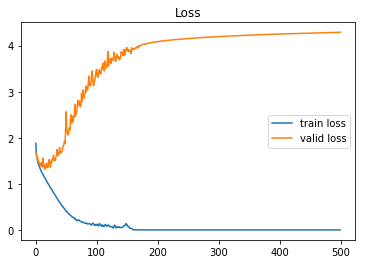

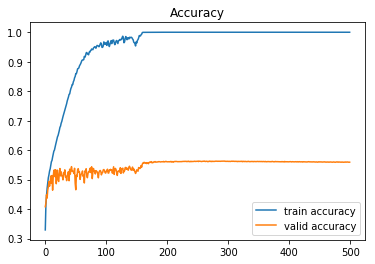

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss2 = model2.history.history["loss"]
valid_loss2 = model2.history.history["val_loss"]

train_acc2 = model2.history.history["acc"]
valid_acc2 = model2.history.history["val_acc"]

plt.plot(range(len(train_loss2)), train_loss2, label="train loss")
plt.plot(range(len(valid_loss2)), valid_loss2, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc2)), train_acc2, label="train accuracy")
plt.plot(range(len(valid_acc2)), valid_acc2, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()